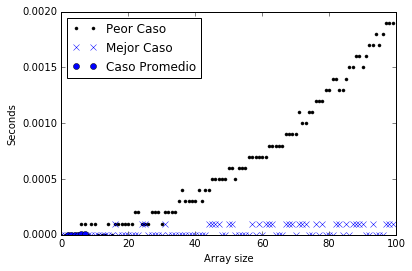

In [17]:
#Solucion del Punto 1: Analisis experimental de Insertion sort
import time
import gc
import itertools
import math
import numpy as np
import pylab as pl
%matplotlib inline

#funcion que mide el tiempo de ejecucion de insertion sort
def calc_time(sort_function, array):
    timesum = 0
    gc.collect()
    for i in range(10):
        array_copy = list(array)
        tic = time.time()
        sort_function(array_copy)
        toc = time.time()
        timesum += toc - tic
    return timesum/10

#Ordenamiento por insercion
def insertion_sort(A):
    j = 1
    while j < len(A):
        key = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > key):
            A[i + 1] = A[i]
            i = i -1
        A[i + 1] = key
        j = j + 1

#El mejor caso para el insertion sort es cuando el arreglo esta ordenado. Para medir el tiempo del mejor caso generamos 
#arreglos ordenados de tamaño 1,2,3,...,100, es decir [1],[1,2],[1,2,3],...,[1,2,3,...100]. 
def exper_analysis_best_case():
    results_insertion = []
    for i in range(2,102):
        results_insertion.append(calc_time(insertion_sort, range(1,i)))
    return results_insertion

#El peor caso para el insertion sort es cuando el arreglo esta ordenado de forma descendente. Para medir el tiempo del peor caso
#generamos arreglos ordenados de forma descendente de tamaño 1,2,3,...,100, es decir [1],[2,1],[3,2,1],...,[100,99,98,...,1]. 
def exper_analysis_worst_case():
    results_insertion = []
    for i in range(1,101):
        results_insertion.append(calc_time(insertion_sort, range(i,0,-1)))
    return results_insertion

#Para el caso promedio se generaron todas las permutaciones de tamaño 1,2,3,4,5,6. Se dejo hasta 6 porque con 6 se tendran 
#720 permutaciones y si se dejara con un numero mas grande el analisis se demoraria muchos mas.
#En definitiva para hallar el caso promedio se hallo el promedio de los tiempos de ejecucion de todas las entradas de tamaño n.
def exper_analysis_average_case():
    results_insertion = []
    for i in range(2,8):
        sum = 0.0
        for secuence in itertools.permutations(range(1,i)):
            sum += calc_time(insertion_sort,list(secuence))
        results_insertion.append(sum/math.factorial(len(range(1,i))))
    return results_insertion

#Graficamos los resultados obtenidos del analisis experimental
pl.clf()
interval = range(0,100)
interval2 = range(2,8)
y1 = np.array(exper_analysis_worst_case())
y2 = np.array(exper_analysis_best_case())
y3 = np.array(exper_analysis_average_case())
pl.plot(interval, y1, 'k.', label = 'Peor Caso')
pl.plot(interval, y2, 'bx', label = 'Mejor Caso')
pl.plot(interval2, y3, 'bo', label = 'Caso Promedio')
pl.xlabel('Array size')
pl.ylabel('Seconds')
pl.legend(loc = 'upper left')
pl.show()

In [ ]:
Como se puede ver en la grafica para insertion sort el peor caso es de orden cuadratico, el mejor caso es de orden lineal, 
y el caso promedio tiene un orden cuadratico.  
Como ya tenemos los tiempos para arreglos de tamaño 4,5 y 6 solo nos queda hacer interpolacion para hallar la formula 
para el mejor caso, el peor caso y el caso promedio.

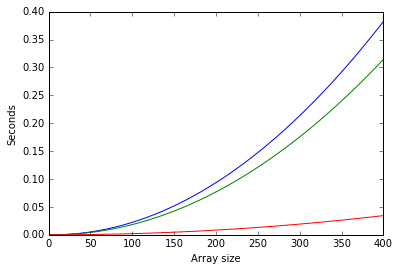

In [21]:
import numpy as np
import pylab as pl
%matplotlib inline

#Tomando los tiempos que se obtuvieron para arreglos de tamaño 4,5 y 6 (para el peor de los casos) hallamos los coeficientes del
#polinomio cuadratico por medio de una interpolacion.A continuacion se ve el polinomio cuadratico que se obtuvo al hacer la
#interpolacion.
def polynomial_worst_case(x):
    return (2.441411000*10**(-6))*x**2-(2.115890099*10**(-5))*x+4.638683000*10**(-5)

#Tomando los tiempos que se obtuvieron para arreglos de tamaño 4,5 y 6 (para el caso promedio) hallamos los coeficientes del
#polinomio cuadratico por medio de una interpolacion.A continuacion se ve el polinomio cuadratico que se obtuvo al hacer la
#interpolacion.
def polynomial_average_case(x):
    return (2.008981000*10**(-6))*x**2-(1.802978200*10**(-5))*x+4.033128600*10**(-5)

#Tomando los tiempos que se obtuvieron para arreglos de tamaño 4,5 y 6 (para el meor caso) hallamos los coeficientes del
#polinomio cuadratico por medio de una interpolacion.A continuacion se ve el polinomio cuadratico que se obtuvo al hacer la
#interpolacion.
def polynomial_best_case(x):
    return (2.196582000*10**(-7))*x**2-(1.971182699*10**(-6))*x+4.409136000*10**(-6)

#Graficamos los 3 polinomios:
interv = np.arange(401)
pl.ylabel('Seconds')
pl.xlabel('Array size')
pl.plot(interv, polynomial_worst_case(interv), interv, polynomial_average_case(interv),interv, polynomial_best_case(interv))
pl.show()

In [ ]:
En la grafica podemos ver el peor caso (curva azul), el caso promedio (curva verde) y el mejor caso (curva roja).
En conclusion, con este experimento hemos verificado que la teoria se cumple, es decir que insertion sort tiene orden cuadratico
en el peor de los casos, y en el caso promedio, y tiene orden lineal en el mejor de los casos.

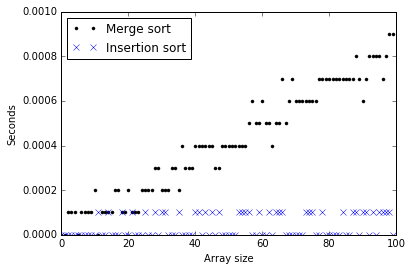

In [38]:
#Solucion del Punto 2: Analisis experimental de Insertion sort y Merge sort
import time
import gc
import random as rnd
import numpy as np
import pylab as pl
%matplotlib inline

#funcion que mide el tiempo de ejecucion de insertion sort y merge sort
def calc_time(sort_function, array):
    timesum = 0
    gc.collect()
    for i in range(10):
        array_copy = list(array)
        tic = time.time();
        sort_function(array_copy)
        toc = time.time();
        timesum += toc - tic
    return timesum/10

#Ordenamiento por insercion
def insertion_sort(A):
    j = 1
    while j < len(A):
        key = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > key):
            A[i + 1] = A[i]
            i = i -1
        A[i + 1] = key
        j = j + 1

#Ordenamiento por mezcla        
def merge(A, p, q, r):
    L = A[p:q+1]+[float('inf')]
    R = A[q+1:r+1]+[float('inf')]
    i = 0
    j = 0
    for k in range(p, r + 1):
        if L[i] <= R[j]:
            A[k] = L[i]
            i += 1
        else:
            A[k] = R[j]
            j += 1

def merge_sort_main(A, p, r):
    if p < r:
        q = int((p + r) / 2.0)
        merge_sort_main(A, p, q)
        merge_sort_main(A, q + 1, r)
        merge(A, p, q, r)

def merge_sort(A):
    merge_sort_main(A, 0, len(A) - 1)

def analysis_best_case():
    results_merge = []
    results_insertion = []
    for i in range(2,102):
        results_merge.append(calc_time(merge_sort, range(1,i)))
        results_insertion.append(calc_time(insertion_sort, range(1,i)))
    return (results_merge, results_insertion)

pl.clf()
sizes = np.arange(0,100,1)
(y1,y2) = np.array(analysis_best_case())
pl.plot(sizes, y1, 'k.', label = 'Merge sort')
pl.plot(sizes, y2, 'bx', label = 'Insertion sort')
pl.xlabel('Array size')
pl.ylabel('Seconds')
pl.legend(loc = 'upper left')
pl.show()

In [ ]:
Para el mejor caso insertion sort siempre es mas eficiente que merge sort.

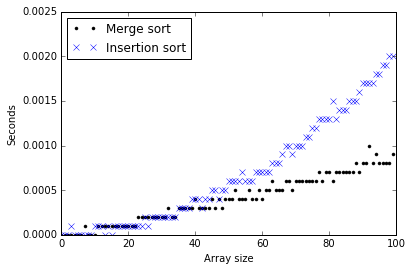

In [41]:
def analysis_worst_case():
    results_merge = []
    results_insertion = []
    for i in range(1,101):
        results_merge.append(calc_time(merge_sort, range(i,0,-1)))
        results_insertion.append(calc_time(insertion_sort, range(i,0,-1)))
    return (results_merge, results_insertion)

pl.clf()
sizes = np.arange(0,100,1)
(y1,y2) = np.array(analysis_worst_case())
pl.plot(sizes, y1, 'k.', label = 'Merge sort')
pl.plot(sizes, y2, 'bx', label = 'Insertion sort')
pl.xlabel('Array size')
pl.ylabel('Seconds')
pl.legend(loc = 'upper left')
pl.show()


In [ ]:
k=40.Para el peor caso, a partir de arreglos de tamaño 40 insertion sort comienza a ser menos eficiente que merge sort.

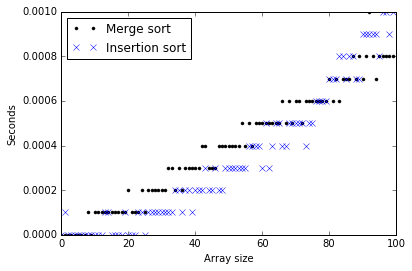

In [42]:
import random as rnd

def analysis_average_case():
    results_merge = []
    results_insertion = []
    for i in sizes:
        list1 = range(i)
        rnd.shuffle(list1)
        results_merge.append(calc_time(merge_sort, list1))
        results_insertion.append(calc_time(insertion_sort, list1))       
    return (results_merge, results_insertion)

pl.clf()
sizes = np.arange(0,100,1)
(y1,y2) = np.array(analysis_average_case())
pl.plot(sizes, y1, 'k.', label = 'Merge sort')
pl.plot(sizes, y2, 'bx', label = 'Insertion sort')
pl.xlabel('Array size')
pl.ylabel('Seconds')
pl.legend(loc = 'upper left')
pl.show()


In [ ]:
k=80.Para el caso promedio, para tamaños mayores que 80 insertion sort comienza a ser menos eficiente que merge sort. 

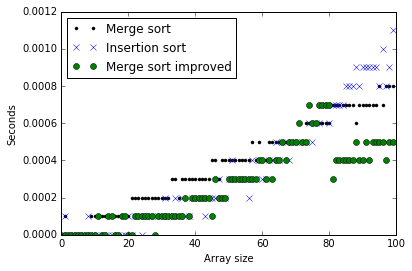

In [25]:
#A continuacion se combinara inserti
import time
import gc
import itertools
import math
import numpy as np
import pylab as pl
%matplotlib inline

#funcion que mide el tiempo de ejecucion de insertion sort y merge sort
def calc_time(sort_function, array):
    timesum = 0
    gc.collect()
    for i in range(10):
        array_copy = list(array)
        tic = time.time();
        sort_function(array_copy)
        toc = time.time();
        timesum += toc - tic
    return timesum/10

#Ordenamiento por mezcla        
def merge(A, p, q, r):
    L = A[p:q+1]+[float('inf')]
    R = A[q+1:r+1]+[float('inf')]
    i = 0
    j = 0
    for k in range(p, r + 1):
        if L[i] <= R[j]:
            A[k] = L[i]
            i += 1
        else:
            A[k] = R[j]
            j += 1

def merge_sort_main(A, p, r):
    if p < r:
        q = int((p + r) / 2.0)
        merge_sort_main(A, p, q)
        merge_sort_main(A, q + 1, r)
        merge(A, p, q, r)

def merge_sort(A):
    merge_sort_main(A, 0, len(A) - 1)

#Ordenamiento por insercion
def insertion_sort(A):
    j = 1
    while j < len(A):
        key = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > key):
            A[i + 1] = A[i]
            i = i -1
        A[i + 1] = key
        j = j + 1

#Ordenamiento por mezcla mejorado:
def msort(x):
    result = []
    if len(x) < 2:
        return x
    if len(x) <= 80:
        insertion_sort(x)
    else:
        mid = int(len(x)/2)
        y = msort(x[:mid])
        z = msort(x[mid:])
        while (len(y) > 0) or (len(z) > 0):
            if len(y) > 0 and len(z) > 0:
                if y[0] > z[0]:
                    result.append(z[0])
                    z.pop(0)
                else:
                    result.append(y[0])
                    y.pop(0)
            elif len(z) > 0:
                for i in z:
                    result.append(i)
                    z.pop(0)
            else:
                for i in y:
                    result.append(i)
                    y.pop(0)
    return result

def new_analysis_average_case():
    results_merge = []
    results_insertion = []
    results_improved_merge = []
    for i in sizes:
        list1 = range(i)
        rnd.shuffle(list1)
        results_merge.append(calc_time(merge_sort, list1))
        results_insertion.append(calc_time(insertion_sort, list1))
        results_improved_merge.append(calc_time(msort, list1))
    return (results_merge, results_insertion,results_improved_merge) 

pl.clf()
sizes = np.arange(0,100,1)
(y1,y2,y3) = np.array(new_analysis_average_case())
pl.plot(sizes, y1, 'k.', label = 'Merge sort')
pl.plot(sizes, y2, 'bx', label = 'Insertion sort')
pl.plot(sizes, y3, 'go', label = 'Merge sort improved')
pl.xlabel('Array size')
pl.ylabel('Seconds')
pl.legend(loc = 'upper left')
pl.show() 

In [ ]:
En conclusion podemos ver en la grafica que para cualquier tamaño el algoritmo msort (merge mejorado) es mas eficiente que 
merge_sort y que insertion sort.